Alice Giot

#  lmapr1492 : Tâche 8

In [86]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants
from IPython.display import Image

### Téléchargement de la structure de bande Cs2O

Structure de bande électronique de Cs₂O :


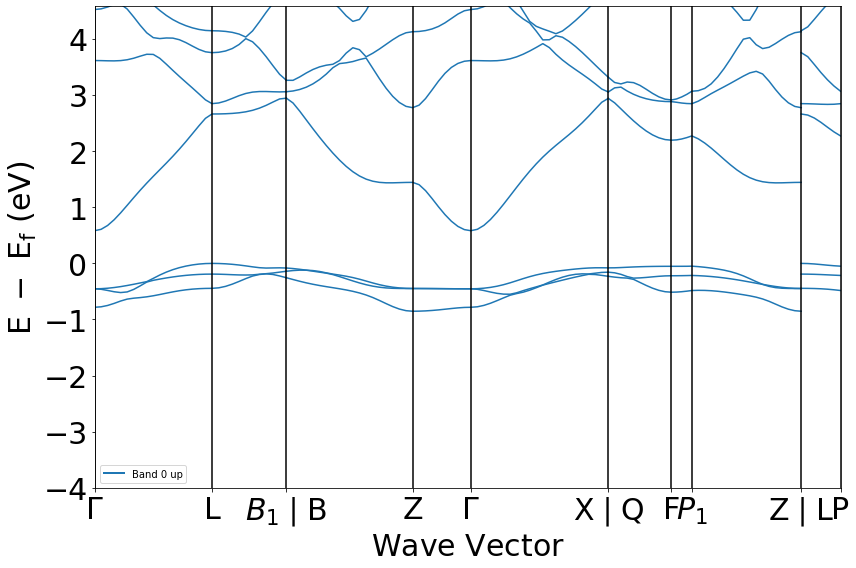

In [87]:
#pour télécharger la structure de bande du matériau qui vous a été attribué
with MPRester("WNdO6TZG8SzgeuFt") as m:
    
    # Bandstructure for material id
    bandStructure = m.get_bandstructure_by_material_id("mp-7988")

#Affiche de la bande électronique
bsPlot = BSPlotter(bandStructure)
print("Structure de bande électronique de Cs\u2082O :")
bsPlot.show()

### Détermination de la bande interdite

La bande interdite est indirecte.
La bande interdite se trouve entre E-Ef = 0 eV et E-Ef = 0.5831999999999997 eV.
Son énergie est de 0.5831999999999997 eV
Le vecteur de transition est L-\Gamma

Ci-dessous la figure avec la bande interdite en bleu, les maxima de la bande de valence en vert et les minima de la bande conduction en rouge :


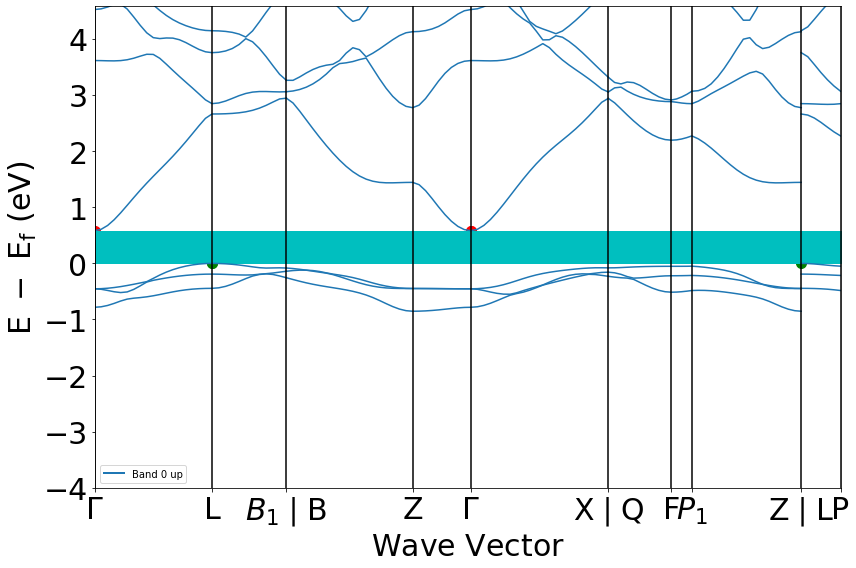

In [99]:
gap= bandStructure.get_band_gap()
energie = gap.get('energy')
if gap.get('direct') == False:
    print('La bande interdite est indirecte.')
else:
    print('La bande interdite est directe.')
fermi = bandStructure.efermi
#print('Energie de fermi : ', fermi, 'eV')
print('La bande interdite se trouve entre E-Ef =', 0, 'eV et E-Ef =', energie,'eV.\nSon énergie est de', energie,'eV')
print('Le vecteur de transition est', gap.get('transition'))
print('\nCi-dessous la figure avec la bande interdite en bleu, les maxima de la bande de valence en vert et les minima de la bande conduction en rouge :')


bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.fill_between(np.linspace(0, bsPlot.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, gap.get('energy'), color ='c')

plt.show()

### Détermination de la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)

Index de la dernière bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})
Index de la première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})

La dispersion maximale de la bande de valence entre Γ-L : 0.5249797008712469
La dispersion minimale de la bande de valence entre Z-Γ : -0.012634224768701414
La dispersion maximale de la bande de conduction entre Γ-L : 2.411361186169144
La dispersion minimale de la bande de conduction entre F-P₁: 0.5078540417100685

Ci-dessous la figure indiquant la dispersion. Les flèches bleues représentent des dispesions maximales et les fleches roses des dispesions minimales.


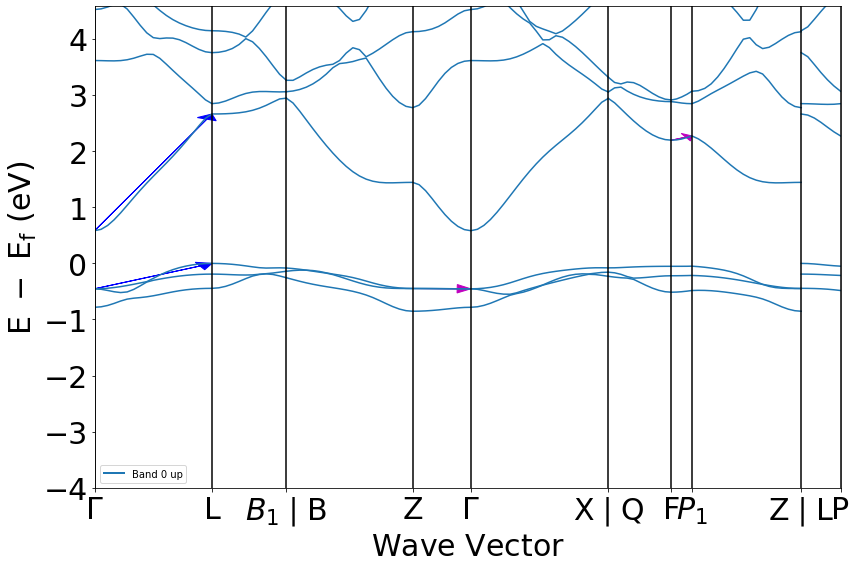

In [100]:
data = bsPlot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance")
energieBand = data.get("energy")


#Différence en x
deltaK=[]
indexDistance=[]
for i in range (len(distance)-1):
    if distance[i] != distance[i+1]:
        deltaK.append(distance[i+1]-distance[i])
        indexDistance.append(i)


#Dernière bande de valence
vbm = bandStructure.get_vbm()

#Premiere bande de conduction
cbm = bandStructure.get_cbm()

print("Index de la dernière bande de valence :",vbm['band_index'])
print("Index de la première bande de conduction :", cbm['band_index'])


#Différence en y
vDeltaE=[]
cDeltaE=[]
for i in range (len(energieBand.get('1'))):
    vDeltaE.append(energieBand.get('1')[i][11][-1]-energieBand.get('1')[i][11][0])
    cDeltaE.append(energieBand.get('1')[i][12][-1]-energieBand.get('1')[i][12][0])

#Toutes les pentes (et les valeurs absolues pour pouvoir les comparer)
vDispersion=[]
vAbsDisp=[]
cDispersion=[]
cAbsDisp=[]
for i in range(len(deltaK)):
    vDispersion.append(vDeltaE[i]/deltaK[i])
    vAbsDisp.append(abs(vDispersion[i]))
    cDispersion.append(cDeltaE[i]/deltaK[i])
    cAbsDisp.append(abs(cDispersion[i]))


#Pente maximum de la bande de valence
indexVMax= vAbsDisp.index(np.max(vAbsDisp))
vMax = vDispersion[indexVMax]

print("\nLa dispersion maximale de la bande de valence entre Γ-L :",vMax)

#Pente minimum de la bande de valence
indexVMin= vAbsDisp.index(np.min(vAbsDisp))
vMin = vDispersion[indexVMin]
print("La dispersion minimale de la bande de valence entre Z-Γ :",vMin)

#Pente maximum de la bande de conduction
indexCMax= cAbsDisp.index(np.max(cAbsDisp))
cMax = cDispersion[indexCMax]
print("La dispersion maximale de la bande de conduction entre Γ-L :",cMax)

#Pente minimum de la bande de conduction
indexCMin= cAbsDisp.index(np.min(cAbsDisp))
cMin = cDispersion[indexCMin]
print("La dispersion minimale de la bande de conduction entre F-P\u2081:",cMin)

print("\nCi-dessous la figure indiquant la dispersion. Les flèches bleues représentent des dispesions maximales et les fleches roses des dispesions minimales.")
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(distance[indexDistance[indexVMax]],energieBand.get('1')[indexVMax][11][0],deltaK[indexVMax],vDeltaE[indexVMax],color='b',head_width = 0.15, head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexCMax]],energieBand.get('1')[indexCMax][12][0],deltaK[indexCMax],cDeltaE[indexCMax],color='b',head_width = 0.15,head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexVMin]],energieBand.get('1')[indexVMin][11][0],deltaK[indexVMin],vDeltaE[indexVMin],color='m',head_width = 0.15,head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexCMin]],energieBand.get('1')[indexCMin][12][0],deltaK[indexCMin],cDeltaE[indexCMin],color='m',head_width = 0.15,head_length = 0.05,length_includes_head=True)





plt.show()

### Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

On procède comme suit :
- Détermination du point maximum/minimum de la bande de valence/conduction
- Approximation de la bande électronique par une parabole ax^2+bx+c avec comme sommet la point. On prend un point proche et on détermine les constantes a,b et c du polynôme.
- Calcul de la masse effective avec la formule suivante : 
Avec ħ =  6.582119569e-16 [m^2*kg/s]


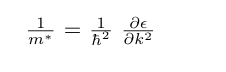

In [90]:
hbar = constants.hbar #constante de Planck [m^2*kg/s]

print("On procède comme suit :")
print("- Détermination du point maximum/minimum de la bande de valence/conduction")
print("- Approximation de la bande électronique par une parabole ax^2+bx+c avec comme sommet la point. On prend un point proche et on détermine les constantes a,b et c du polynôme.")
print("- Calcul de la masse effective avec la formule suivante : ")
print("Avec \u0127 = ", h_bar, "[m^2*kg/s]")
Image(filename='masseEffective.png')


#### Masse effective à la base de la bande de conduction

Coordonées de la base de la bande de conduction : ( 2.764884015652873 , 0.5831999999999997 )
Coordonnées d'un point proche :( 2.717393962959939 , 0.6027999999999998 )
Coordonnées d'un point proche :( 2.717393962959939 , 0.6027999999999998 )
Les constantes de l'équation parabolique : a,b et c valent :
a = 8.690620155330254
b = -48.05711350716662
c = 67.0193724871904

Ci-dessous la figure affiche la parabole de la base de la bande de conduction. Avec :
- Les maxima de la bande de valence en vert et les minima de la bande conduction en rouge 
- Les points proches utilisés pour déterminer l'équation en rose
- Les paraboles en bleu


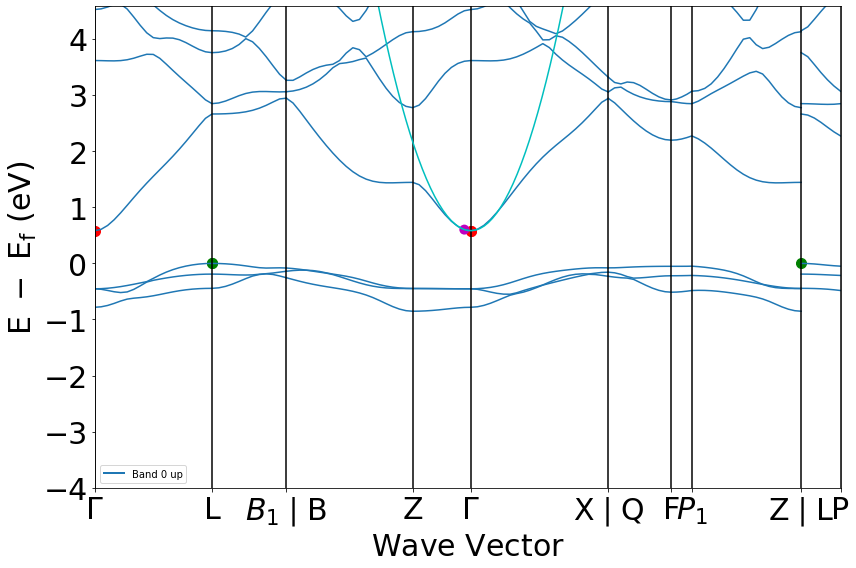

In [101]:
#Base de la bande de conduction
#Distance à laquelle se trouve le minimum de la bande de conduction
xc = distance[indexDistance[4]]
#Energie minimale de la bande de conduction = energie de la bande interdite
yc = energie 
print("Coordonées de la base de la bande de conduction : (", xc,",", yc, ")")

#Choix d'un point proche
xPc = distance[indexDistance[4]] - deltaK[3]/(len(energieBand.get('1')[3][12])-1)
yPc = energieBand.get('1')[3][12][-2]
print("Coordonnées d'un point proche :(", xPc,",", yPc, ")")

ac = (yPc-yc)/(xPc-xc)**2 
bc = -2*xc*ac
cc = yc+ac*xc*xc

print("Coordonnées d'un point proche :(", xPc,",", yPc, ")")
print("Les constantes de l'équation parabolique : a,b et c valent :")
print("a =", ac)
print("b =", bc)
print("c =", cc)



#Figure
print("\nCi-dessous la figure affiche la parabole de la base de la bande de conduction. Avec :")
print("- Les maxima de la bande de valence en vert et les minima de la bande conduction en rouge ")
print("- Les points proches utilisés pour déterminer l'équation en rose")
print("- La parabole en bleu")

#Graphique conduction
polynomc = np.polynomial.polynomial.Polynomial([cc,bc,ac]) 
abscissesc = np.linspace(1.5,4.5,100)
ordonnéesc = np.zeros((100))
for i in range(0,100):
    ordonnéesc[i] = polynomc(abscissesc[i]) 
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.scatter(xPc,yPc , c = "m", s = 100, edgecolor = 'none', marker = 'o')
plt.plot(abscissesc, ordonnéesc, color="c")





In [92]:
#Calcul de la masse effective

ev = 1.60218*10**(-19) #conversion eV en Joule [kg*m^2/s^2]
angstrom = 10**(-20) #conversion des Angström^2 en m^2

derivc = 2*ac*ev*angstrom
meffc = (hbar**2)/derivc

print("La dérivée seconde du polynôme ax^2+bx+c est donnée par 2*a : ", 2*ac, "eV*A^2") 
print("La masse effective à la base de la bande de conduction est", meffc, "kg")


La dérivée seconde du polynôme ax^2+bx+c est donnée par 2*a :  17.38124031066051 eV*A^2
La masse effective à la base de la bande de conduction est 3.9935603509239195e-31 kg


#### Masse effective au sommet de la bande de valence


Coordonées de la base de la bande de valence : ( 0.8630809900802705 , 0 )
Coordonnées d'un point proche :( 0.8151320461869221 , -0.0029000000000001247 )
Les constantes de l'équation parabolique : a,b et c valent :
a = -1.2613624724992532
b = 2.1773159432295066
c = -0.9396000000000403

Ci-dessous la figure affiche la parabole du sommet la bande de valence. Avec :
- Les maxima de la bande de valence en vert et les minima de la bande conduction en rouge 
- Les points proches utilisés pour déterminer l'équation en rose
- La parabole en bleu


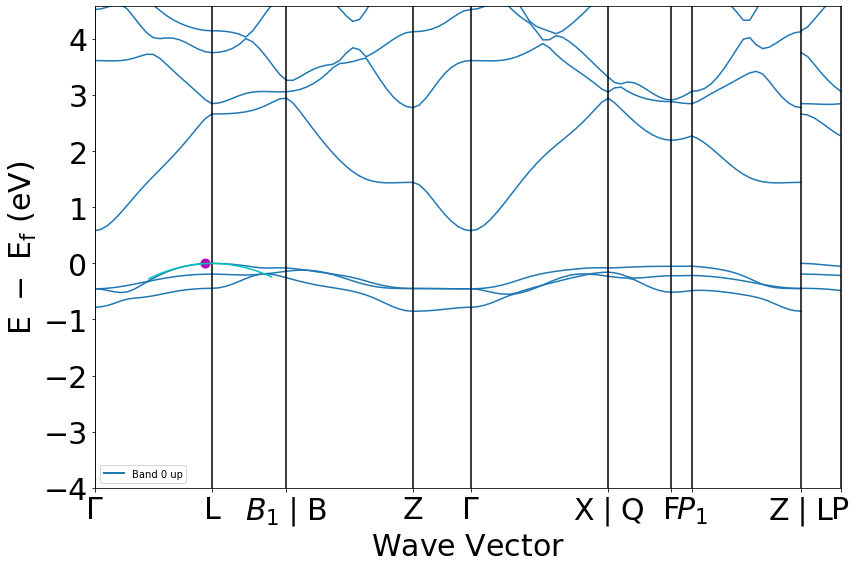

In [102]:
#Sommet de la bande de valence
#Distance à laquelle se trouve le maximum de la bande de valence
xv = distance[indexDistance[1]]
#Energie maximale de la bande de valence = energie de référence du graphique
yv = 0
print("\nCoordonées de la base de la bande de valence : (", xv,",", yv, ")")

#Choix d'un point proche
xPv = distance[indexDistance[1]] - deltaK[0]/(len(energieBand.get('1')[0][11])-1)
yPv = energieBand.get('1')[0][11][-2]

av = (yPv-yv)/(xPv-xv)**2 
cv = yv+av*xv*xv

print("Coordonnées d'un point proche :(", xPv,",", yPv, ")")
print("Les constantes de l'équation parabolique : a,b et c valent :")
print("a =", av)
print("b =", bv)
print("c =", cv)



#Figure
print("\nCi-dessous la figure affiche la parabole du sommet la bande de valence. Avec :")
print("- Les maxima de la bande de valence en vert et les minima de la bande conduction en rouge ")
print("- Les points proches utilisés pour déterminer l'équation en rose")
print("- La parabole en bleu")


#Graphique valence
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
polynomv = np.polynomial.polynomial.Polynomial([cv,bv,av]) 
abscissesv = np.linspace(0.4,1.3,100)
ordonnéesv = np.zeros((100))
for i in range(0,100):
    ordonnéesv[i] = polynomv(abscissesv[i]) 
plt.scatter(xPv,yPv , c = "m", s = 100, edgecolor = 'none', marker = 'o')
plt.plot(abscissesv, ordonnéesv, color="c")


In [103]:
#Calcul de la masse effective

derivv = 2*av*ev*angstrom
meffv = (hbar**2)/derivv


print("La dérivée seconde du polynôme ax^2+bx+c est donnée par 2*a : ", 2*av, "eV*A^2") 
print("La masse effective au sommet de la bande de valence est", meffv, "kg")



La dérivée seconde du polynôme ax^2+bx+c est donnée par 2*a :  -2.5227249449985063 eV*A^2
La masse effective au sommet de la bande de valence est -2.7515101197279135e-30 kg
